# Machine Learning Assignment 1

Muhammad Ghulam Abbas (29417) and Adnan Ali (29401)

# k Nearest Neighbours 


In this project, We build a k Nearest Neighbours classifier to classify the mushrooms into edible (safe to eat) or poisonous category.
We have used Mushroom Data Set downloaded from the UCI Machine Learning Repository.

There is no simple rule for classifying a mushroom as edible or poisonous and multiple features need to be considered. 

Background: This dataset contains attributes about 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom, and was donated to the UCI Machine Learning repository nearly 30 years ago. The dataset was originally taken from The Audubon Society Field Guide to North American Mushrooms (1981).

# Dataset Description

The data set can be found at the following url:-
https://archive.ics.uci.edu/dataset/73/mushroom

The attribute information of this dataset is as follows:-
    Target poisonous e=edible, p=poisonous 
 1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
 2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
 3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
 4. bruises?:                 bruises=t,no=f
 5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
 6. gill-attachment:          attached=a,descending=d,free=f,notched=n
 7. gill-spacing:             close=c,crowded=w,distant=d
 8. gill-size:                broad=b,narrow=n
 9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,
                                 orange=o,pink=p,purple=u,red=e, white=w,yellow=y
 10. stalk-shape:              enlarging=e,tapering=t
 11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
 12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
 13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
 14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
 15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
 16. veil-type:                partial=p,universal=u
 17. veil-color:               brown=n,orange=o,white=w,yellow=y
 18. ring-number:              none=n,one=o,two=t
 19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
 20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
 21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
 22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
df_orig = pd.read_csv('mushrooms.csv', delimiter = ',')

In [3]:
df = df_orig.copy()

In [4]:
df.shape

(8124, 23)

In [5]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data cleaning


In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

df.dtypes


In [9]:
# encode categorical feature into numerical data
def encode_data(df):
    # Encode categorical variables using label encoder
    label_encoder = LabelEncoder()
    print("Categorical columns:", df.select_dtypes(include=['object']).columns)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [10]:
df= encode_data(df)

Categorical columns: Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spa

In [11]:
df.dtypes


class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [12]:
df.isna().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
print("Encoded",
df['gill-size'].value_counts()
,
"Orig", 
df_orig['gill-size'].value_counts()
)

Encoded gill-size
0    5612
1    2512
Name: count, dtype: int64 Orig gill-size
b    5612
n    2512
Name: count, dtype: int64


In [14]:
print("Encoded",
df['bruises'].value_counts()
,
"Orig", 
df_orig['bruises'].value_counts()
)

Encoded bruises
0    4748
1    3376
Name: count, dtype: int64 Orig bruises
f    4748
t    3376
Name: count, dtype: int64


In [15]:
print("Encoded",
df['gill-color'].value_counts())
print(
"Orig", 
df_orig['gill-color'].value_counts()
)

#black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

Encoded gill-color
0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: count, dtype: int64
Orig gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64


In [16]:
print("Encoded",
df['ring-type'].value_counts())
print(
"Orig", 
df_orig['ring-type'].value_counts()
)

#cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

Encoded ring-type
4    3968
0    2776
2    1296
1      48
3      36
Name: count, dtype: int64
Orig ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64


In [17]:
print("Encoded",
df['stalk-surface-below-ring'].value_counts())
print(
"Orig", 
df_orig['stalk-surface-below-ring'].value_counts()
)

 #13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

Encoded stalk-surface-below-ring
2    4936
1    2304
0     600
3     284
Name: count, dtype: int64
Orig stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64


In [18]:
print("Encoded",
df['population'].value_counts())
print(
"Orig", 
df_orig['population'].value_counts()
)

#21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

Encoded population
4    4040
5    1712
3    1248
2     400
0     384
1     340
Name: count, dtype: int64
Orig population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64


In [19]:
round(df['class'].value_counts()*100/df['class'].value_counts().sum(), 2)

class
0    51.8
1    48.2
Name: count, dtype: float64

# Exploratory Data Analysis 

Now, plot the histograms to check variable distributions to find out if they are normal or skewed.

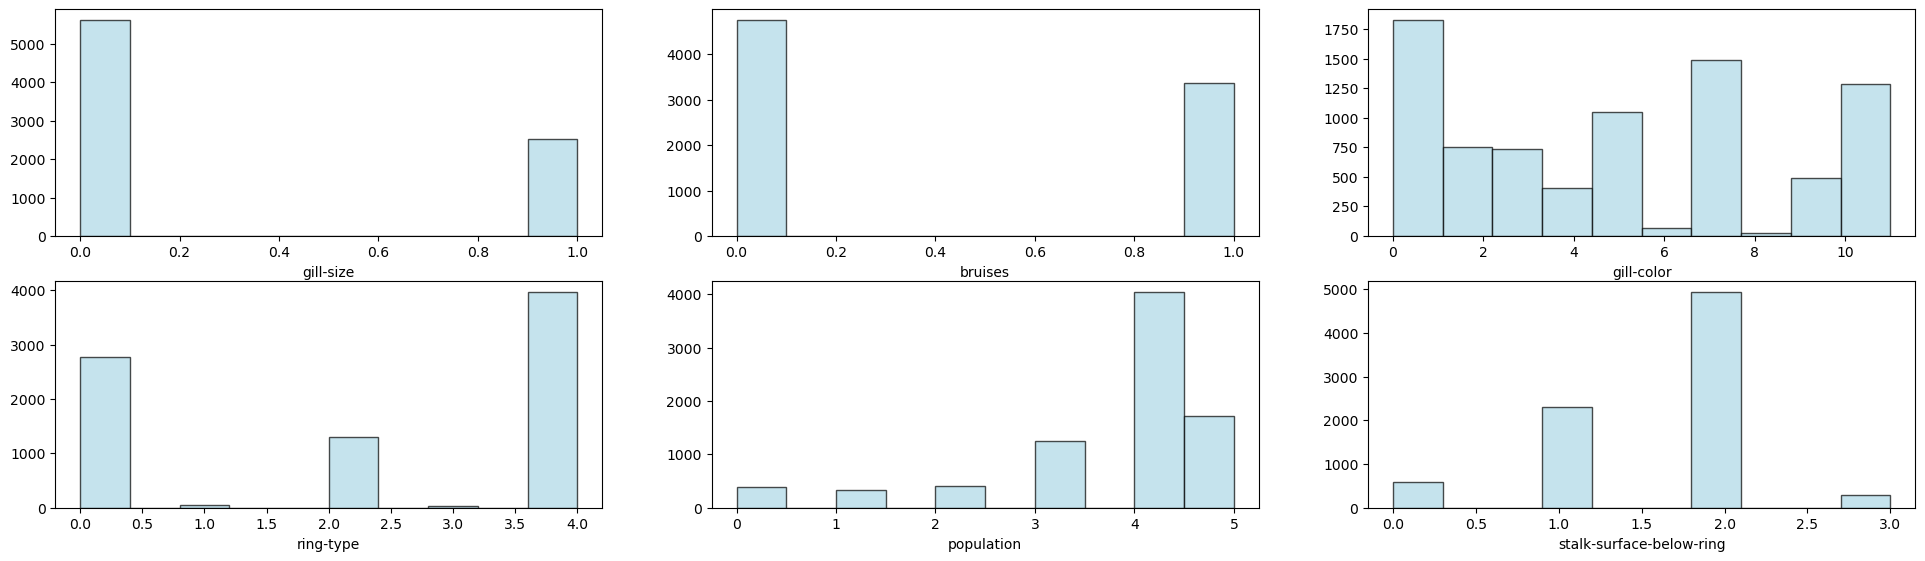

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))

plt.subplot(3, 3, 1)
plt.hist(df['gill-size'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('gill-size')

plt.subplot(3, 3, 2)
plt.hist(df['bruises'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('bruises')

plt.subplot(3, 3, 3)
plt.hist(df['gill-color'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('gill-color')

plt.subplot(3, 3, 4)
plt.hist(df['ring-type'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('ring-type')

plt.subplot(3, 3, 5)
plt.hist(df['population'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('population')

plt.subplot(3, 3, 6)
plt.hist(df['stalk-surface-below-ring'], color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('stalk-surface-below-ring')

plt.show()


We can see that gill color is positively skewed.
while population is negatively skewed.

Rest of the features are distributed around extreme values.


In [21]:
df.describe().iloc[:,1:].T[['mean','50%']]


,mean,50%
cap-shape,3.348104,3.0
cap-surface,1.827671,2.0
cap-color,4.504677,4.0
bruises,0.415559,0.0
odor,4.144756,5.0
gill-attachment,0.974151,1.0
gill-spacing,0.161497,0.0
gill-size,0.309207,0.0
gill-color,4.810684,5.0
stalk-shape,0.567208,1.0


# CORRELATION:-

In [22]:
corr = df.corr()
corr_values = corr['class'].sort_values().round(3)
corr_values

gill-color                 -0.531
bruises                    -0.502
ring-type                  -0.412
stalk-root                 -0.379
gill-spacing               -0.348
stalk-surface-above-ring   -0.335
stalk-surface-below-ring   -0.299
ring-number                -0.214
stalk-color-above-ring     -0.154
stalk-color-below-ring     -0.147
stalk-shape                -0.102
odor                       -0.094
cap-color                  -0.031
cap-shape                   0.053
gill-attachment             0.129
veil-color                  0.145
spore-print-color           0.172
cap-surface                 0.178
habitat                     0.217
population                  0.299
gill-size                   0.540
class                       1.000
veil-type                     NaN
Name: class, dtype: float64

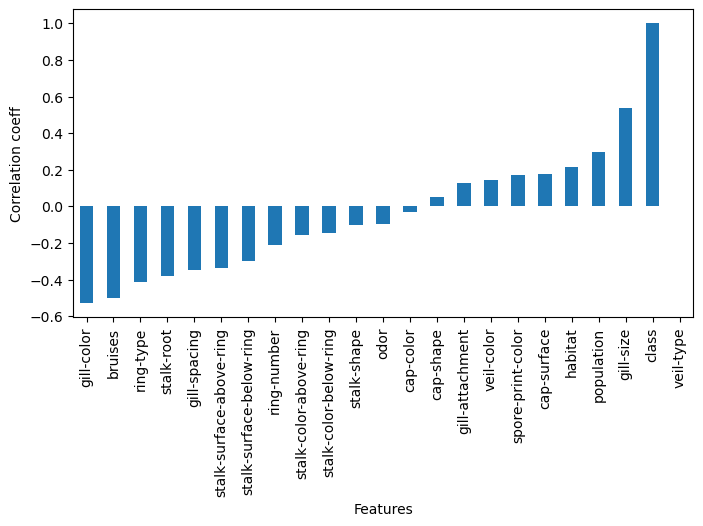

In [23]:
plt.figure(figsize=(8,4))
corr_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation coeff')
plt.show()

More than half of the feature variables demonstrate weakly negative correlations with the target feature "class,"  indicating that higher values in these attributes tend to coincide with a lower likelihood of belonging to the target class.

Remaining feature variables demonstrate weakly positive correlations with the target feature "class,"  indicating that higher values in these attributes tend to coincide with a higher likelihood of belonging to the target class.


Gill color is negatively correlated

Gill size is positively correlated

In [24]:
corr.round(2)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,...,-0.30,-0.15,-0.15,NaN,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,...,-0.03,-0.03,-0.03,NaN,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,...,0.11,0.07,0.07,NaN,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,...,-0.05,0.00,0.01,NaN,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,...,0.46,0.08,0.09,NaN,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,...,0.06,0.17,0.17,NaN,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,...,-0.12,0.10,0.10,NaN,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,...,-0.21,0.27,0.25,NaN,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,...,0.01,0.30,0.28,NaN,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,...,0.26,-0.06,-0.07,NaN,-0.10,0.10,0.63,-0.42,-0.03,-0.20


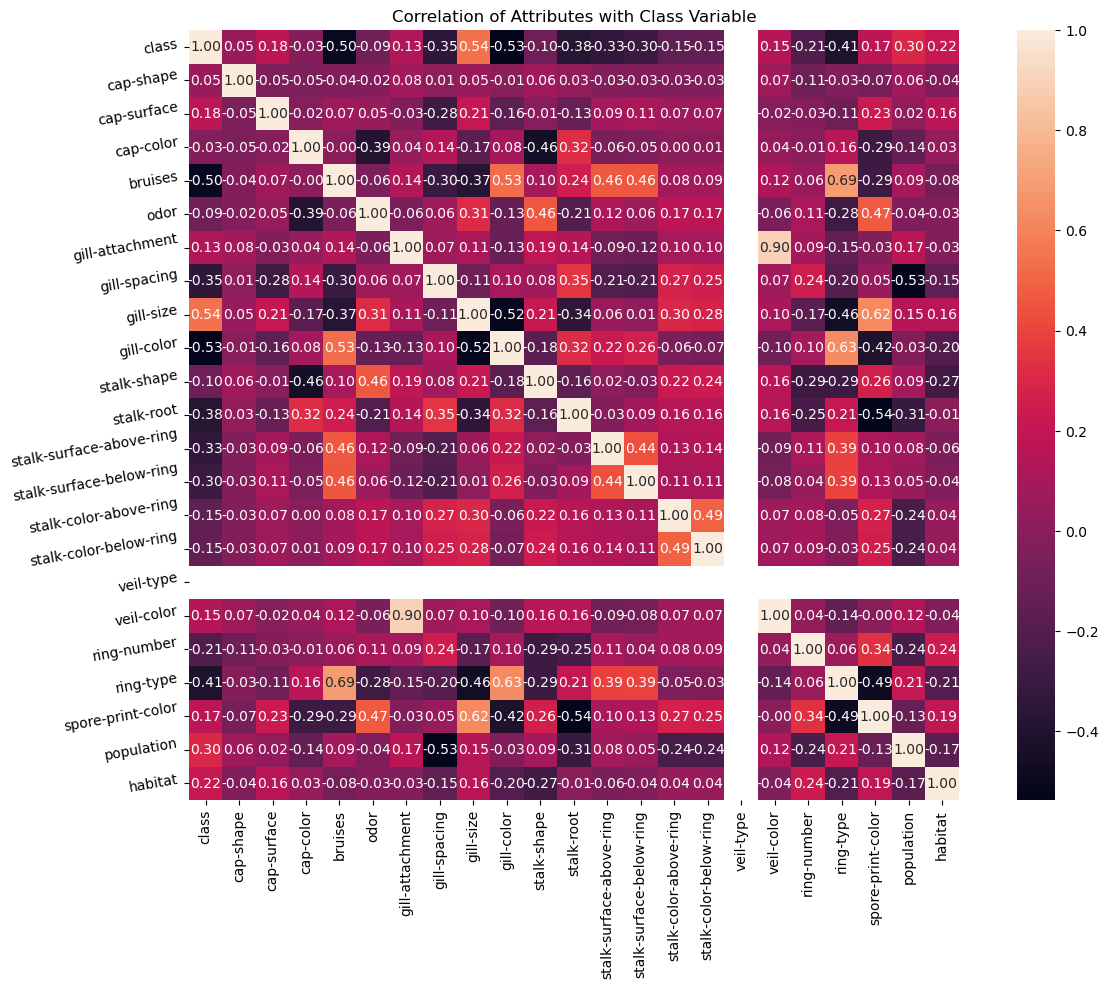

In [25]:
plt.figure(figsize=(15, 10))
plt.title('Correlation of Attributes with Class Variable')

correlation = df.corr()

heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=10)

plt.show()

# Interpretation
From the above correlation heat map, we can conclude that :-

Class is highly positively correlated with Gill_Size (correlation coefficient = 0.54).

Class is highly negatively correlated with bruises(correlation coefficient = -0.50), Gill_colo (correlation coefficient = -0.53).

Class is negatively correlated with ring_type (correlation coefficient=-0.41), stalk_surface_below_ring = -0.38

Class is weakly positive correlated with population (correlation coefficient=0.30).

# Class: (0 for edible, 1 for poisonous)

Each species is identified as definitely edible,
or poisonuous : definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  

The Guide clearly states that there is no simple rule for determining the edibility of a mushroom.

In [26]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

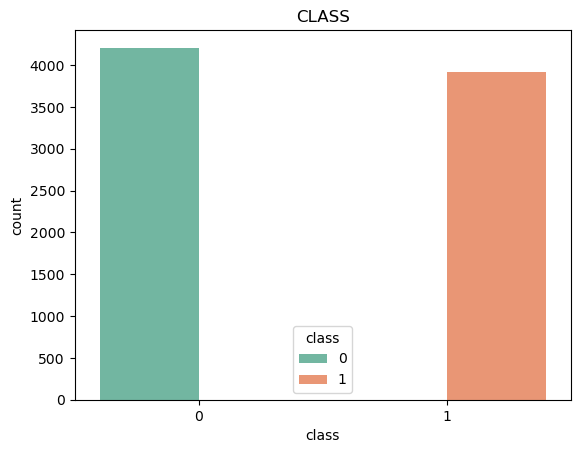

In [27]:
sns.countplot(x=df["class"], hue='class', data=df, palette='Set2')
plt.title("CLASS")
plt.show()

Relationship of Class with Gill Size.

In [28]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

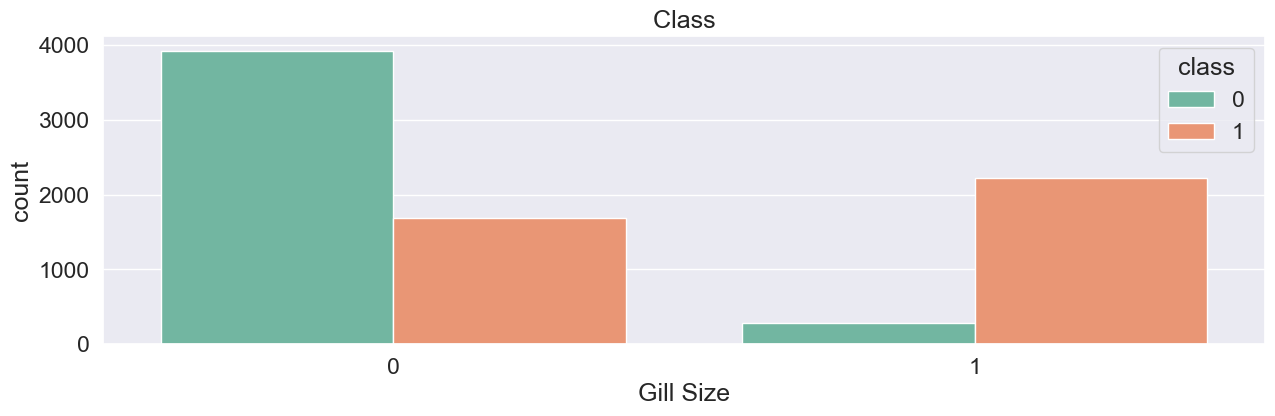

In [29]:
plt.figure(figsize=(15, 4))
sns.set(font_scale=1.5)
sns.countplot(x='gill-size', hue='class', data=df, palette='Set2')
plt.xlabel('Gill Size')
plt.title(' Class ')
plt.show()

There are more edible mushrooms with broad gill size.

There are more poisonous mushrooms with narrow gill size.


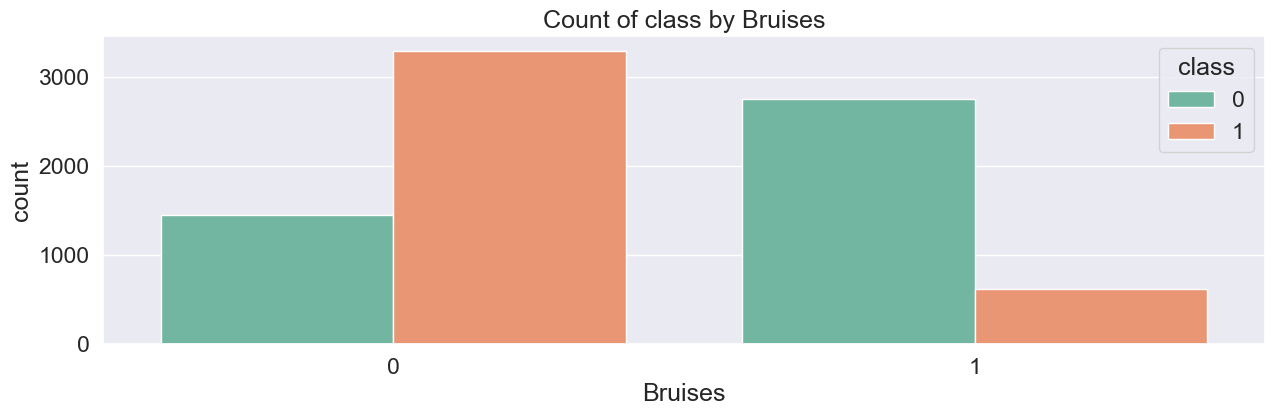

In [30]:
plt.figure(figsize=(15, 4))
sns.set(font_scale=1.5)
sns.countplot(x='bruises', hue='class', data=df, palette='Set2')
plt.xlabel('Bruises')
plt.title('Count of class by Bruises')
plt.show()

most Edible mushrooms don't have less bruises 

most poisonous mushrooms have bruises

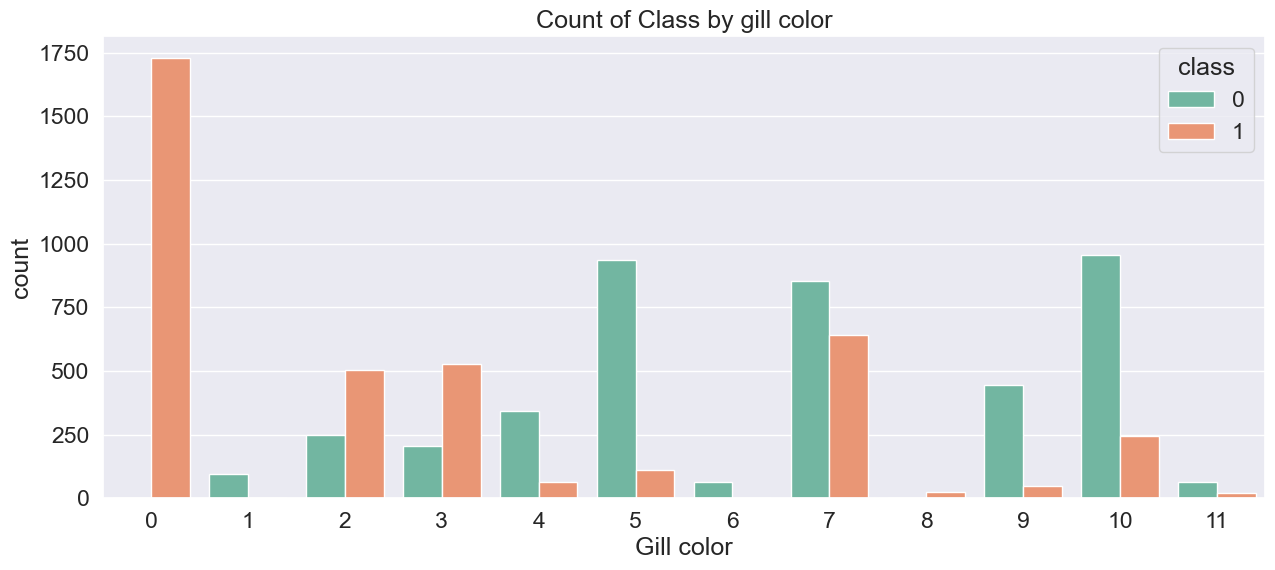

In [31]:
plt.figure(figsize=(15, 6))
sns.set(font_scale=1.5)
sns.countplot(x='gill-color', hue='class', data=df, palette='Set2')
plt.xlabel('Gill color')
plt.title('Count of Class by gill color')
plt.show()

It shows that the mushrooms with black colored gills are almost always poisonous  
Grey and chocolate gill colors are also poisonous

pink color is split almost half with more on edible side

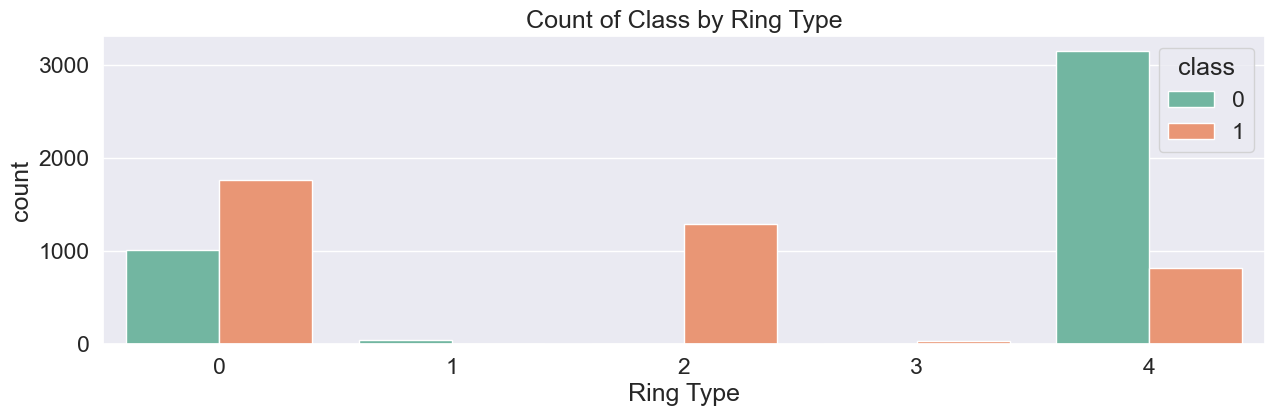

In [32]:
plt.figure(figsize=(15, 4))
sns.set(font_scale=1.5)
sns.countplot(x='ring-type', hue='class', data=df, palette='Set2')
plt.xlabel('Ring Type')
plt.title('Count of Class by Ring Type')
plt.show()

most edible Mushrooms are with pendant ring type.
evanescent ring type are mostly poisonous but some of these are edible.

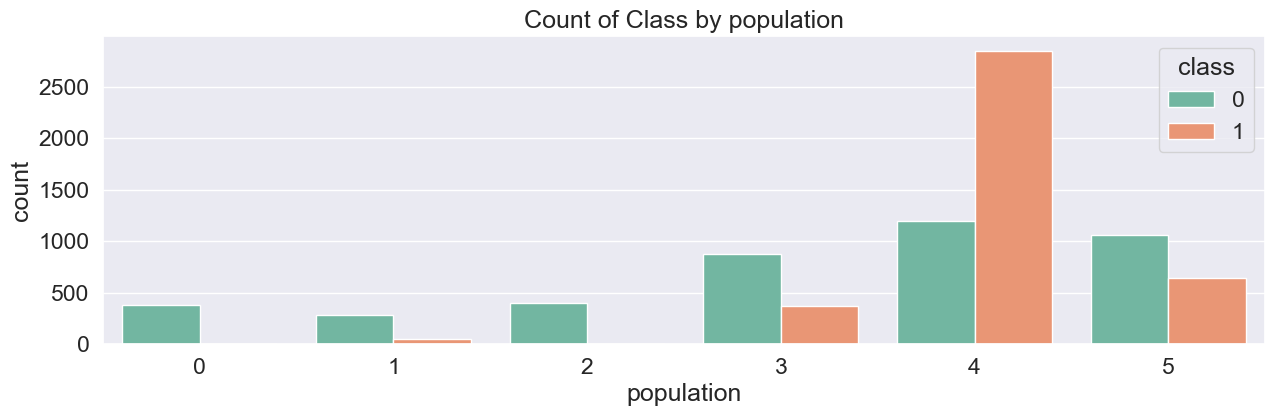

In [33]:
plt.figure(figsize=(15, 4))
sns.set(font_scale=1.5)
sns.countplot(x='population', hue='class', data=df, palette='Set2')
plt.xlabel('population')
plt.title('Count of Class by population')
plt.show()

If there are several mushrooms they are usually poisonous.
solitary mushrooms are mostly edible but also have poisonous mushrooms

# CONCLUSION:-


Edible mushrooms species outnumber poisonous mushroom species.
Broad gill size and lack of bruises usually indicate edible mushroom species

Dark colored mushrooms are usually poisonous.

# Detecting outliers and anomalies

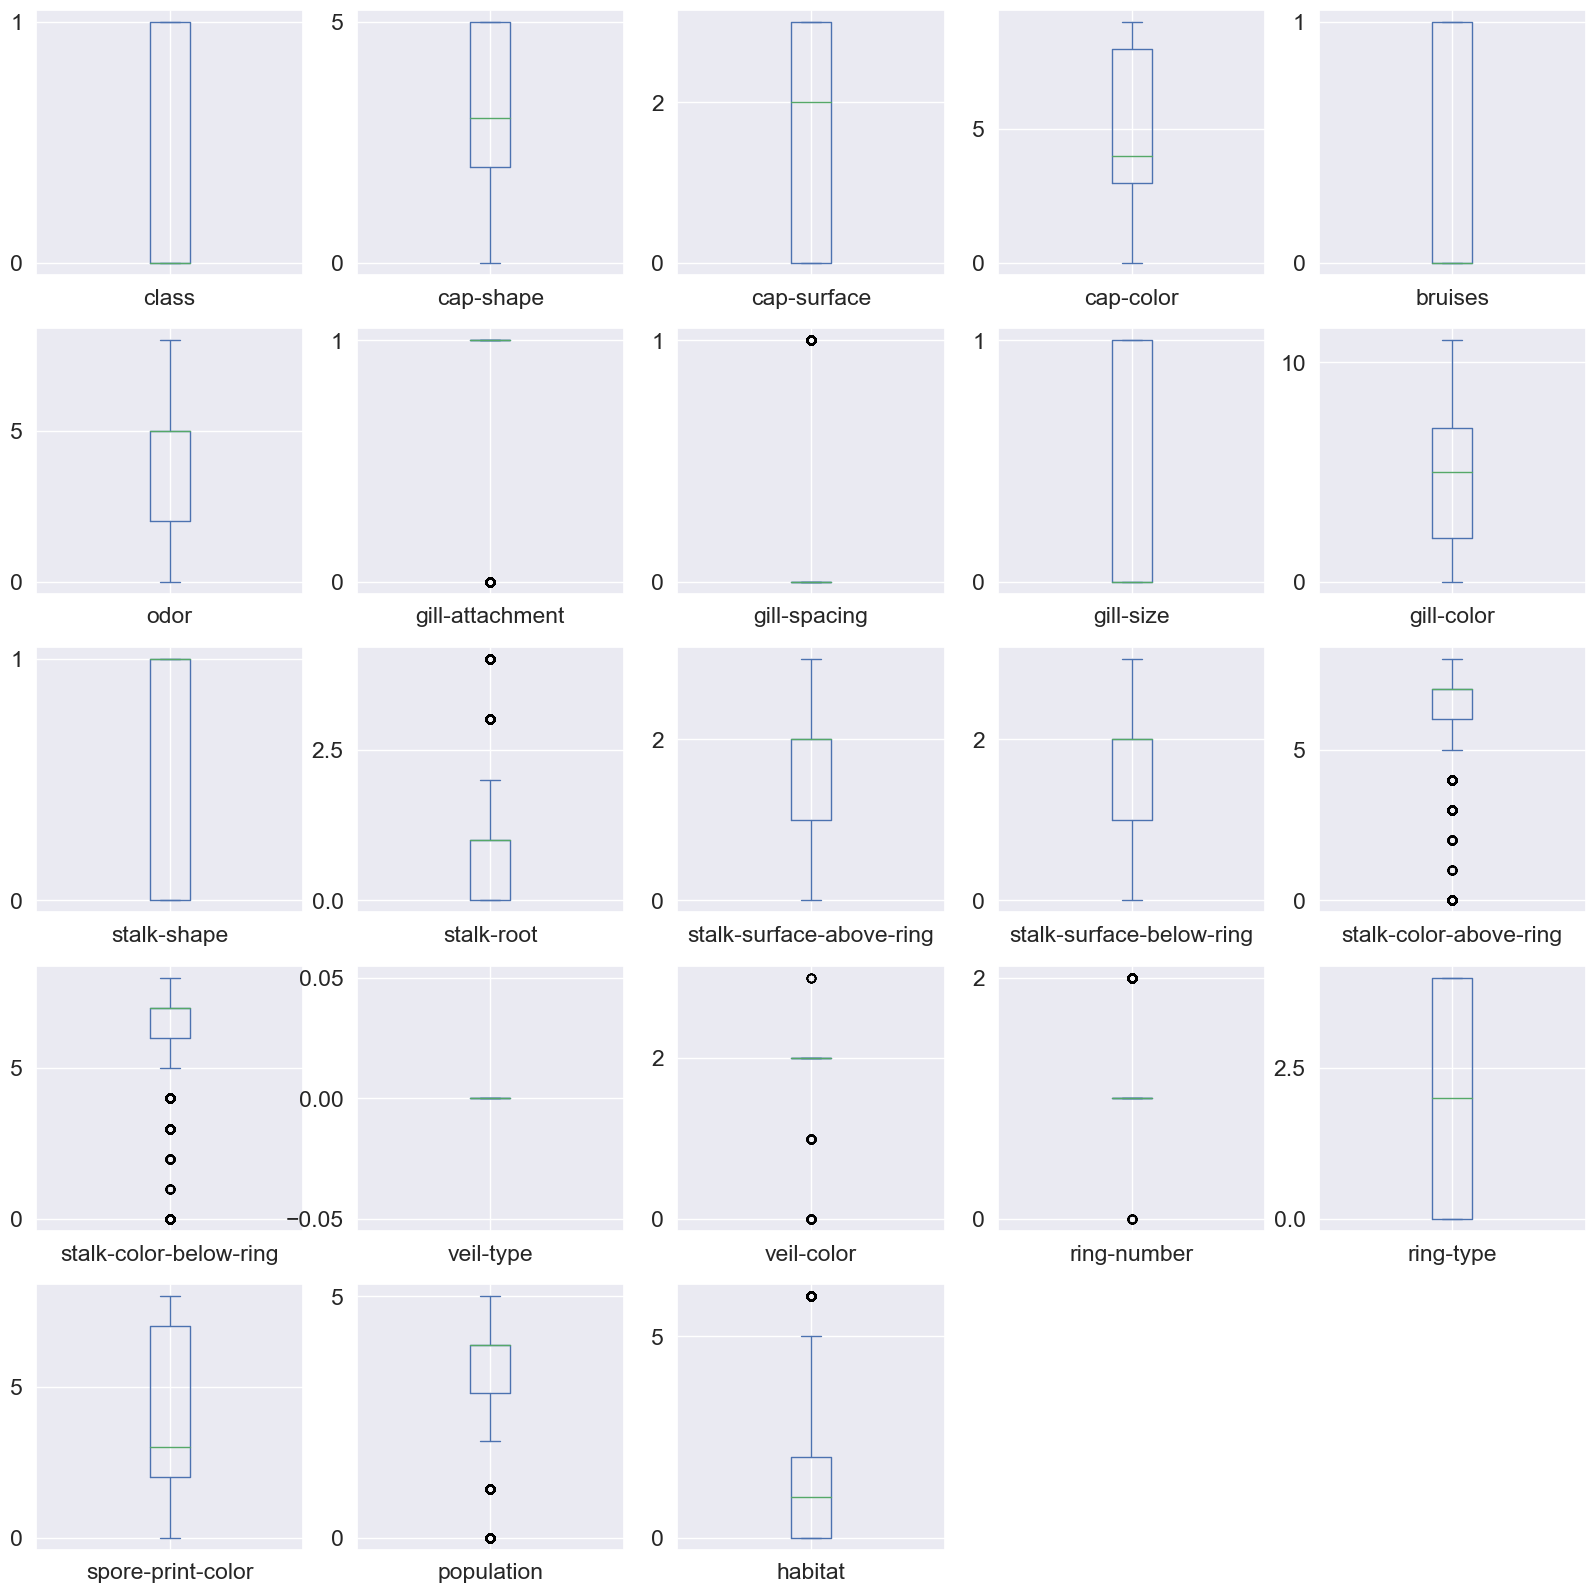

In [34]:
df.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
sns.set(font_scale = 3)

There are few outliers in stalk color above ring and below ring but these columns are not strongly correlated.
and therefore can be dropped without loss of quality.

population column has some outliers  

In [35]:

def identify_outliers(df, column_name):
    q25, q75 = np.percentile(df[column_name], 25), np.percentile(df[column_name], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in df[column_name] if x < lower or x > upper]
    return len(outliers)

col_list = ['gill-size', 'bruises', 'gill-color', 'ring-type', 'population', 'stalk-surface-below-ring']
for col in col_list:
    outliers_count = identify_outliers(df, col)
    print(f"Identified outliers for '",col,"' out of 8124 records: ",outliers_count)


Identified outliers for ' gill-size ' out of 8124 records:  0
Identified outliers for ' bruises ' out of 8124 records:  0
Identified outliers for ' gill-color ' out of 8124 records:  0
Identified outliers for ' ring-type ' out of 8124 records:  0
Identified outliers for ' population ' out of 8124 records:  724
Identified outliers for ' stalk-surface-below-ring ' out of 8124 records:  0


# Feature Scaling

In [36]:
df2=df.copy()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [38]:
scaled_data

array([[ 1.0366127 ,  1.02971224,  0.14012794, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [-0.96468045,  1.02971224,  0.14012794, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-0.96468045, -2.08704716,  0.14012794, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.96468045, -0.8403434 ,  0.14012794, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [ 1.0366127 , -0.21699152,  0.95327039, ...,  1.42842641,
         0.28432981,  0.28570978],
       [-0.96468045,  1.02971224,  0.14012794, ...,  0.16925365,
        -2.11182722,  0.28570978]])

# Model Selection 

In [105]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Split data into features (X) and target (y)
#X = df.drop('class', axis=1)
#y = df['class']

## Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
#clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
#models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
#models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

## Print the models and their accuracy on the test set
#print(models_test)


# Model Training

In [50]:
df.shape

(8124, 23)

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# select value for K
k = 505

# Separate features and target variable
X = df.drop(['class'], axis=1)
y = df['class']

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))


Model accuracy score: 0.8995


In [112]:
k = 505
knn_5 = KNeighborsClassifier(n_neighbors=k)


knn_5.fit(X_train, y_train)


y_pred = knn_5.predict(X_test)


print('Model accuracy score with k={0}'.format(k),' : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with k=505  : 0.8995


# Model Evaluation

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

In [122]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-score for each class:", f1)


Precision for each class: [0.86862886 0.94066986]
Recall for each class: [0.95125786 0.84305317]
F1-score for each class: [0.90806754 0.88919041]


In [123]:
accuracy = accuracy_score(y_test, y_pred)
print('Overall accuracy:', accuracy)

Overall accuracy: 0.8995077932731748


In [124]:
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.8971555174385363


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1272
           1       0.94      0.84      0.89      1166

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438



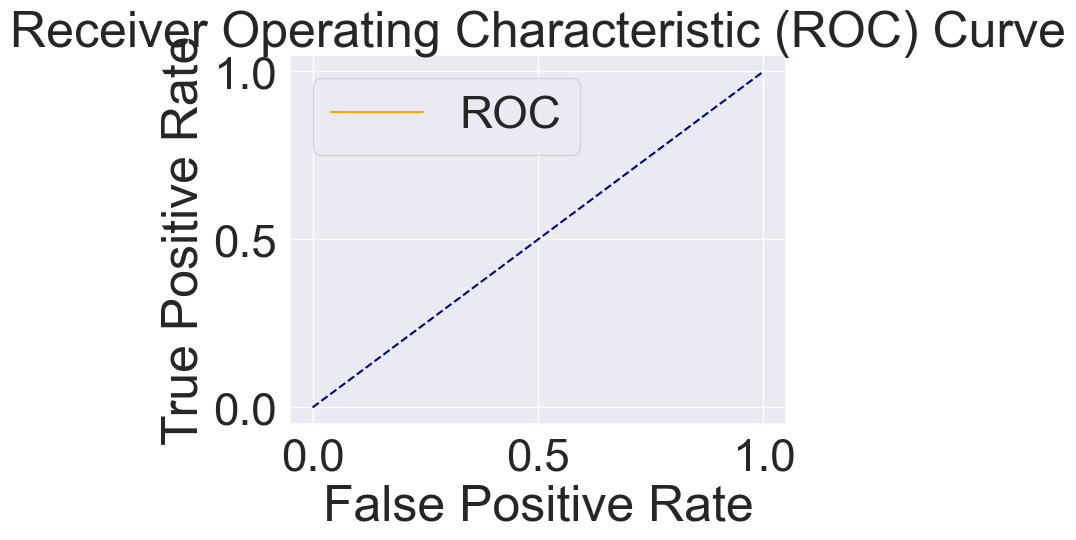

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# AFTER DROPPING COLUMN ONE BY ONE

In [148]:
df3=df.copy()
df3.drop(columns=['cap-shape']               , inplace=True)
df3.drop(columns=['cap-surface']             , inplace=True)
df3.drop(columns=['cap-color']               , inplace=True)
df3.drop(columns=['odor']                    , inplace=True)
df3.drop(columns=['gill-attachment']         , inplace=True)
df3.drop(columns=['gill-spacing']            , inplace=True)
df3.drop(columns=['stalk-shape']             , inplace=True)
df3.drop(columns=['stalk-root']              , inplace=True)
df3.drop(columns=['stalk-surface-above-ring'], inplace=True)
df3.drop(columns=['stalk-color-above-ring']  , inplace=True)
df3.drop(columns=['stalk-color-below-ring']  , inplace=True)
df3.drop(columns=['veil-type']               , inplace=True)
df3.drop(columns=['veil-color']              , inplace=True)
df3.drop(columns=['ring-number']             , inplace=True)
df3.drop(columns=['spore-print-color']       , inplace=True)
df3.drop(columns=['habitat']                 , inplace=True)

In [149]:
df3.describe()

,class,bruises,gill-size,gill-color,stalk-surface-below-ring,ring-type,population
count,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00
mean,0.48,0.42,0.31,4.81,1.60,2.29,3.64
std,0.50,0.49,0.46,3.54,0.68,1.80,1.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,2.00,1.00,0.00,3.00
50%,0.00,0.00,0.00,5.00,2.00,2.00,4.00
75%,1.00,1.00,1.00,7.00,2.00,4.00,4.00
max,1.00,1.00,1.00,11.00,3.00,4.00,5.00


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 220

X = df3.drop(['class'], axis=1)
y = df3['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=k)

# fit the model to the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8972


# FINAL RESULT

In this project, a k-Nearest Neighbors (kNN) classifier model was developed to classify mushrooms species into edible and poisonous. 
The model achieved high performance, with an accuracy of 89% using k=220.

With increasing K there us decrease in accuracy.